### AAI-510 M5 Lab Walkthrough

In this lab walkthrough we will build a Naive Bayes Classifier and analyze the results.

In [11]:
#@title Loading the required libraries
import pandas as pd # Pandas for data manipulation
import seaborn as sns # Seaborn for visualizing. Note: we will also use one of the data sets
import matplotlib.pyplot as plt # Matplotlib for subplots
%matplotlib inline

from sklearn.model_selection import train_test_split,  RandomizedSearchCV # Import train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation
from scipy.stats import randint # Generate random numbers
from sklearn.naive_bayes import GaussianNB

### Data Processing

In [ ]:
#@title Mounting your Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Loading data and viewing it
#df = sns.load_dataset('iris')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv')
shap = df.shape
print("Shape of the dataframe (row, col):",shap,"\r\n")

# Show dataframe
df

Shape of the dataframe (row, col): (768, 9) 



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#@title Designating target and features
y = df.Outcome # Target variable
X = df.drop(columns=['Outcome']) # Features by dropping the target column

In [ ]:
#@title Splitting dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

## Naive Bayes Classifier

In [ ]:
#@title Building the NB Classifier

nbc = GaussianNB() # Create Naive Bayes classifer object
nbc = nbc.fit(X_train, y_train) # Train Naive Bayes Classifer

Train Accuracy: 0.7616387337057728
Test Accuracy: 0.7835497835497836
F1 Score: 0.7883108177225825


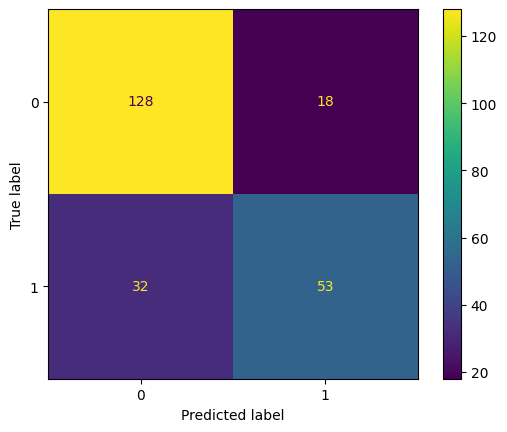

In [ ]:
#@title Evaluating the NB Classifier
y_hat = nbc.predict(X_train) # Predict the response for train dataset
y_pred = nbc.predict(X_test) # Predict the response for test dataset

# Compute training and test accuracy
print("Train Accuracy:", metrics.accuracy_score(y_train, y_hat))
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_pred, y_test, average="weighted"))

# Create the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

## Time Series Analysis

In [2]:
#@title Install sktime package for time series
# Library Overview: http://www.sktime.net/en/latest/get_started.html
# Guide: http://www.sktime.net/en/latest/examples/01_forecasting.html

!pip install sktime -U  >> /dev/null #install package

In [14]:
#@title Importing elements of sktime

from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

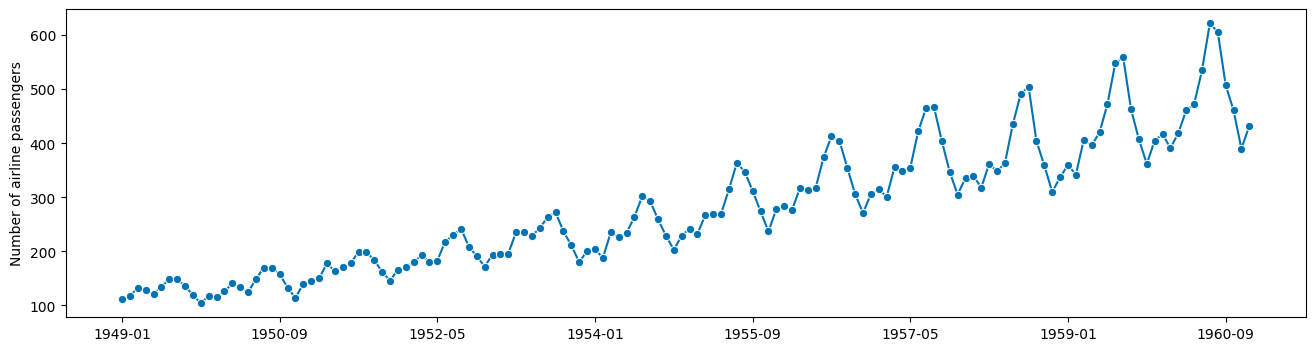

In [15]:
#@title Loading data and viewing it
y = load_airline()

y_train, y_test = temporal_train_test_split(y) #aplitting into train and test sections

# Plotting the data
plot_series(y)
plt.show()

In [16]:
#@title Building the forecaster

# Setting the forecasting horizon
fh = ForecastingHorizon(y_test.index, is_relative=False)

# Fitting the model - many models available
#forecaster = NaiveForecaster(strategy="last") # naive - predicting the last seen value
forecaster = ThetaForecaster(sp=12)  # monthly seasonal periodicity
forecaster.fit(y_train)

ThetaForecaster(sp=12)

The Mean Absolute Error is: 0.08174636612807698


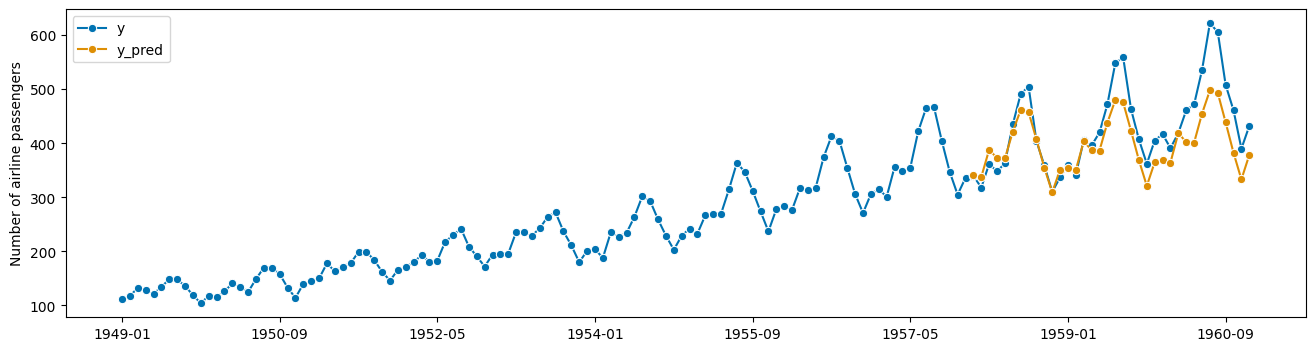

In [18]:
#@title Forecasting and evaluation

y_pred = forecaster.predict(fh) # Forecasting

# Computing error
print("The Mean Absolute Error is:", mean_absolute_percentage_error(y_test, y_pred))

# Plotting predictions and past data
plot_series(y, y_pred, labels=["y", "y_pred"])
plt.show()

## Hidden Markov Model

In [ ]:
#@title Packages

# https://pypi.org/project/mchmm/ - easy to understand
# https://hmmlearn.readthedocs.io/en/stable/tutorial.html - probably same as above